In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

In [9]:
data_train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data_test.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#data_train.info()

In [12]:
all_data = pd.concat((data_train.loc[:,'D1':'D1776'], data_test.loc[:,'D1':'D1776']))
all_data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


Data preprocessing:

We're not going to do anything fancy here:

    First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
    Create Dummy variables for the categorical features
    Replace the numeric missing values (NaN's) with the mean of their respective columns

In [24]:
all_data.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,...,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000
mean,0.077505,0.593561,0.069026,0.037428,0.214025,0.686696,0.273740,0.451342,0.748717,0.270154,...,0.026232,0.015035,0.014555,0.021433,0.013116,0.015675,0.011676,0.010717,0.019034,0.010877
std,0.081249,0.106352,0.078285,0.111878,0.103234,0.079579,0.091563,0.164758,0.072532,0.098037,...,0.159836,0.121703,0.119774,0.144835,0.113780,0.124225,0.107433,0.102973,0.136655,0.103730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033300,0.517811,0.000000,0.000000,0.139463,0.625580,0.205123,0.368555,0.706745,0.192971,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.066700,0.587055,0.050000,0.000000,0.192214,0.673722,0.277716,0.497209,0.737381,0.283474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.100000,0.671289,0.100000,0.000000,0.263255,0.741290,0.334513,0.568045,0.788472,0.344877,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
ser_null = all_data.isnull().sum()

ser_null[all_data.isnull().sum() > 0]

Series([], dtype: int64)

In [20]:
del ser_null

In [39]:
r, c = all_data.shape

In [42]:
stds = []

for i in range(0, c):
    stds.append(all_data.iloc[:,i].std())

print (np.mean(stds))

0.157152826277


In [46]:
thresh_std = np.mean(stds)


std_thresh = []

for i in range(0, c):
    if(all_data.iloc[:, i].std() < thresh_std):
        std_thresh.append(all_data.columns[i])

print(std_thresh[:15])

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D9', 'D10', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17']


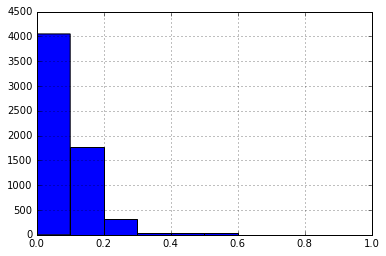

In [47]:
all_data['D1'].hist()

In [50]:
good_std = list(set(list(all_data.columns)) - set(std_thresh))
good_std[:5]

['D1136', 'D1137', 'D1134', 'D1135', 'D1132']

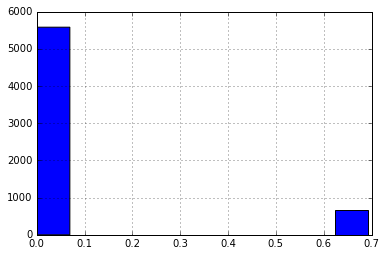

In [59]:
len(good_std)

564

In [61]:
matrix_corr = all_data[good_std].corr()
matrix_corr.shape

(564, 564)

In [67]:
n_feat = matrix_corr.shape[0]

thresh_corr = 0.8

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,n_feat): #for 'size' features
    for j in range(i+1,n_feat): #avoid repetition
        if (matrix_corr.iloc[i,j] >= thresh_corr and matrix_corr.iloc[i,j] < 1) or (matrix_corr.iloc[i,j] < 0 and matrix_corr.iloc[i,j] <= -thresh_corr):
            corr_list.append([matrix_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (good_std[i],good_std[j],v))            

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

D203 and D195 = 0.90
D1366 and D1385 = 0.89
D1739 and D1565 = 0.88
D1614 and D1470 = 0.88
D177 and D659 = 0.88
D1739 and D1596 = 0.88
D1299 and D1337 = 0.88
D194 and D104 = 0.87
D969 and D196 = 0.87
D1749 and D1565 = 0.87
D1299 and D1412 = 0.87
D1749 and D1744 = 0.87
D204 and D196 = 0.86
D1406 and D1266 = 0.86
D1190 and D1096 = 0.86
D1128 and D1096 = 0.86
D1767 and D1602 = 0.86
D83 and D659 = 0.86
D1128 and D1190 = 0.86
D1363 and D1285 = 0.86
D1109 and D1128 = 0.85
D1614 and D1602 = 0.85
D1594 and D1690 = 0.85
D1744 and D1614 = 0.85
D1406 and D1337 = 0.84
D1596 and D1690 = 0.84
D1587 and D1764 = 0.83
D1739 and D1614 = 0.83
D1299 and D1397 = 0.83
D1622 and D1587 = 0.83
D200 and D196 = 0.82
D1744 and D1565 = 0.82
D1337 and D1412 = 0.82
D969 and D204 = 0.82
D1470 and D1602 = 0.82
D1739 and D1749 = 0.82
D1366 and D1232 = 0.82
D1739 and D1690 = 0.82
D1495 and D1605 = 0.82
D1366 and D1299 = 0.81
D1700 and D1470 = 0.81
D1366 and D1337 = 0.81
D1470 and D1767 = 0.81
D1176 and D1159 = 0.81
D1406

In [68]:
len(good_std), len(s_corr_list)

(564, 62)

In [69]:
x = all_data[good_std].values
y = data_train['Activity'].values
x.shape, y.shape

((6252L, 564L), (3751L,))

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=502)
pca.fit(x)
x_pca = pca.transform(x)
x_pca.shape

(6252L, 502L)

In [73]:
x_train = x_pca[:data_train.shape[0]]
x_test = x_pca[data_train.shape[0]:]

from sklearn.cross_validation import train_test_split

x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train, y, test_size=0.33, random_state=42)

x_train_train.shape, y_train_train.shape

((2513L, 502L), (2513L,))

In [74]:
from operator import itemgetter
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
 
names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM",
         "Decision Tree",
         "Random Forest",
         "AdaBoost",
         "Naive Bayes",
         "QDA"]
 
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [77]:
scores = {}

for name, clf in zip(names, classifiers):
    clf.fit(x_train_train, y_train_train)
    scores[name] = clf.score(x_train_val, y_train_val)

sorted(scores.items(), key=itemgetter(1))

for name in scores:
    print name + " accuracy: %0.3f" % scores[name]
    print "---------------------------"

Decision Tree accuracy: 0.641
---------------------------
QDA accuracy: 0.713
---------------------------
Naive Bayes accuracy: 0.527
---------------------------
Linear SVM accuracy: 0.772
---------------------------
RBF SVM accuracy: 0.578
---------------------------
AdaBoost accuracy: 0.705
---------------------------
Random Forest accuracy: 0.640
---------------------------
Nearest Neighbors accuracy: 0.734
---------------------------


As we see, Linear SVM accuracy has the best score. Now we find the best estimators for Linear SVM

In [78]:
from sklearn.grid_search import GridSearchCV

In [120]:
clf = SVC()

parameter_grid = {'C': [0.025, 0.5, 1],
                  'probability': [True],
                  'kernel': ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=10)

In [121]:
grid_search = grid_search.fit(x_train, y)

In [94]:
print(grid_search.best_score_)

In [82]:
grid_search.best_estimator_

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
clf_best = SVC(C=0.025, kernel='linear', probability=True)
clf_best.fit(x_train_train, y_train_train)
clf_best.score(x_train_val, y_train_val)

0.77221324717285944

In [106]:
y_test = clf_best.predict_proba(x_test)

array([[ 0.13011334,  0.86988666],
       [ 0.82784182,  0.17215818],
       [ 0.19264617,  0.80735383],
       [ 0.79265269,  0.20734731]])

In [112]:
y_test[0:5]

array([[ 0.25190181,  0.74809819],
       [ 0.13011334,  0.86988666],
       [ 0.82784182,  0.17215818],
       [ 0.19264617,  0.80735383],
       [ 0.79265269,  0.20734731]])

In [113]:
y_test[:5, 0], len(y_test)

(array([ 0.25190181,  0.13011334,  0.82784182,  0.19264617,  0.79265269]),
 2501)

In [114]:
result_df = pd.DataFrame(columns=('MoleculeId', 'PredictedProbability'))

In [117]:
result_df['MoleculeId'] = range(1, len(y_test)+1)
result_df['PredictedProbability'] = y_test[:, 0]
result_df.head()

,MoleculeId,PredictedProbability
0,1,0.251902
1,2,0.130113
2,3,0.827842
3,4,0.192646
4,5,0.792653


In [119]:
result_df.to_csv("Bio-Response-SVM.csv", index=False)